In [ ]:
pip install dynamiqs

In [ ]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

#System parameters converted to Hz
#system parameters (from the challenge)
omega_a_0 = 5.26 * 2 * jnp.pi  # GHz (memory mode frequency)
omega_b_0 = 7.70 * 2 * jnp.pi  # GHz (buffer mode frequency)
phi_a = 0.06
phi_b = 0.29
h = 6.626e-25  # Planck's constant in GHz·s
E_J = 42.76  # Convert from GHz to actual energy
delta_E_J = 0.47  # Convert from GHz to actual energy
omega_d = 7.623 * 2 * jnp.pi  # GHz (drive frequency)
omega_p = 2.891 * 2 * jnp.pi  # GHz (pump frequency)
epsilon_d = -3.815 * 2 * jnp.pi * 1e-3  # MHz converted to GHz
epsilon_p = 0.122  # rad

#Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))  # Memory mode annihilation operator
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))  # Buffer mode annihilation operator

#Define the Hamiltonian
#H_0: Free Hamiltonian
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

phi = phi_a*(a+a.dag()) + phi_b*(b+b.dag())
#H_ATS: Asymmetrically Tuned SQUID Hamiltonian (converted to operator form)
H_ATS = dq.modulated(lambda t: -2 * E_J * jnp.sin(epsilon_p * jnp.cos(omega_p*t)), dq.sinm(phi))+ dq.modulated(lambda t: 2* delta_E_J * jnp.cos(epsilon_p * jnp.cos(omega_p*t)), dq.cosm(phi))

#H_d: Drive Hamiltonian for the buffer mode
H_d = dq.timecallable(lambda t: 2 * epsilon_d * jnp.cos(omega_d * t ) * (b + b.dag()))

#Total Hamiltonian (ensuring all terms are operator-compatible)
H = H_0 + H_ATS + H_d

kappa_a = 9.3 * 1e-6 # relaxation rate of mode a
kappa_b = 2.6 * 1e-3 # relaxation rate of mode b

L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]  # Dissipators for buffer and memory modes

psi0 = dq.coherent((n_a, n_b), [0, 0])  # Vacuum state in both modes

t = jnp.linspace(0, 4000, 100)  # Time from 0 to 4 units

res = dq.mesolve(H, L, psi0, t, solver = dq.solver.Tsit5(max_steps=100000000))

rho_a = dq.ptrace(res.states, 0)

dq.plot.wigner_gif(rho_a)

/usr/local/lib/python3.11/dist-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
|█████▊    |  58.6% ◆ elapsed 01h13m02s ◆ remaining 23m26s

In [ ]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

#System parameters converted to Hz
#system parameters (from the challenge)
omega_a_0 = 5.26 * 2 * jnp.pi  # GHz (memory mode frequency)
omega_b_0 = 7.70 * 2 * jnp.pi  # GHz (buffer mode frequency)
phi_a = 0.06
phi_b = 0.29
h = 6.626e-25  # Planck's constant in GHz·s
E_J = 42.76  # Convert from GHz to actual energy
delta_E_J = 0.47  # Convert from GHz to actual energy
omega_d = 7.623 * 2 * jnp.pi  # GHz (drive frequency)
omega_p = 2.891 * 2 * jnp.pi  # GHz (pump frequency)
epsilon_d = -3.815 * 2 * jnp.pi * 1e-3  # MHz converted to GHz
epsilon_p = 0.122  # rad

#Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))  # Memory mode annihilation operator
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))  # Buffer mode annihilation operator

#Define the Hamiltonian
#H_0: Free Hamiltonian
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

phi = phi_a*(a+a.dag()) + phi_b*(b+b.dag())
#H_ATS: Asymmetrically Tuned SQUID Hamiltonian (converted to operator form)
H_ATS = dq.modulated(lambda t: -2 * E_J * jnp.sin(epsilon_p * jnp.cos(omega_p*t)), dq.sinm(phi))+ dq.modulated(lambda t: 2* delta_E_J * jnp.cos(epsilon_p * jnp.cos(omega_p*t)), dq.cosm(phi))

#H_d: Drive Hamiltonian for the buffer mode
H_d = dq.timecallable(lambda t: 2 * epsilon_d * jnp.cos(omega_d * t ) * (b + b.dag()))

#Total Hamiltonian (ensuring all terms are operator-compatible)
H = H_0 + H_ATS + H_d

kappa_a = 9.3 * 1e-6 # relaxation rate of mode a
kappa_b = 2.6 * 1e-3 # relaxation rate of mode b

L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]  # Dissipators for buffer and memory modes

psi0 = dq.coherent((n_a, n_b), [0, 0])  # Vacuum state in both modes

t = jnp.linspace(0, 400, 100)  # Time from 0 to 4 units

res = dq.mesolve(H, L, psi0, t, solver = dq.solver.Tsit5(max_steps=100000000))

rho_a = dq.ptrace(res.states, 0)

dq.plot.wigner_gif(rho_a)

/usr/local/lib/python3.11/dist-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
|██████████| 100.0% ◆ elapsed 05m45s ◆ remaining 0.00ms
100%|██████████| 50/50 [00:06<00:00,  7.22it/s]


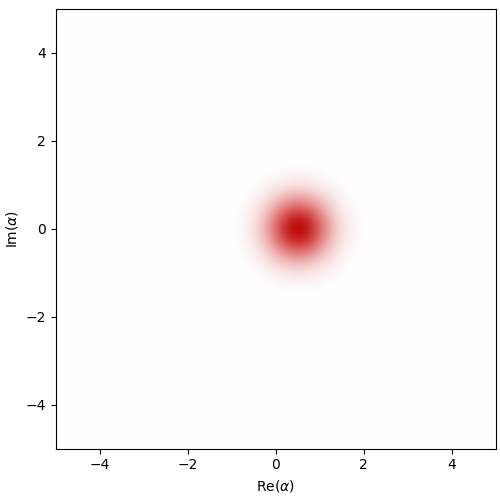

In [7]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Define units
GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

# System parameters (converted to Hz)
omega_a_0 = 5.26 * GHz  # Memory mode frequency
omega_b_0 = 7.70 * GHz  # Buffer mode frequency
phi_a = 0.06
phi_b = 0.29
e_J = 12.03 * GHz  # Josephson energy
delta_e_J = 0.47 * GHz  # Josephson energy variation

kappa_a = 9.3 * kHz  # Relaxation rate of mode a
kappa_b = 2.6 * MHz  # Relaxation rate of mode b

g2_target = 0.763 * MHz  # Target two-photon coupling strength
alpha_target = np.sqrt(5.0)  # Target alpha (cat size)

# Driving strengths
epsilon_p = 2 * g2_target / (e_J * phi_a**2 * phi_b)  # Flux pump power
epsilon_d = -alpha_target**2 * np.conj(g2_target)  # Buffer pump power

# Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5    # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))  # Memory mode annihilation operator
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))  # Buffer mode annihilation operator

# Define Hamiltonian
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

# Define phase-dependent term
phi = phi_a * (a + a.dag()) + phi_b * (b + b.dag())

# H_ATS: Asymmetrically Tuned SQUID Hamiltonian
H_ATS = dq.modulated(lambda t: -2 * e_J * jnp.sin(epsilon_p * jnp.cos(omega_b_0 * t)), dq.sinm(phi)) + \
         dq.modulated(lambda t: 2 * delta_e_J * jnp.cos(epsilon_p * jnp.cos(omega_b_0 * t)), dq.cosm(phi))

# H_d: Drive Hamiltonian for the buffer mode
H_d = dq.modulated(lambda t: 2 * epsilon_d * jnp.cos(omega_a_0 * t), (b + b.dag()))

# Total Hamiltonian (ensuring all terms are operator-compatible)
H = H_0 + H_ATS + H_d

# Define dissipators
L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]  # Dissipators for buffer and memory modes

# Define initial state
psi0 = dq.coherent((n_a, n_b), [0.5, 0])  # Vacuum state in both modes

# Time evolution
ts = jnp.linspace(0, 4000, 100)  # Simulation time

# Solve the master equation
res = dq.mesolve(H, L, psi0, ts, solver=dq.solver.Tsit5(max_steps=100000000))

# Partial trace over buffer mode to obtain the memory mode state
rho_a = dq.ptrace(res.states, 0)

# Plot the Wigner function animation
dq.plot.wigner_gif(rho_a)

|██████████| 100.0% ◆ elapsed 05m35s ◆ remaining 0.00ms
100%|██████████| 50/50 [00:07<00:00,  7.08it/s]


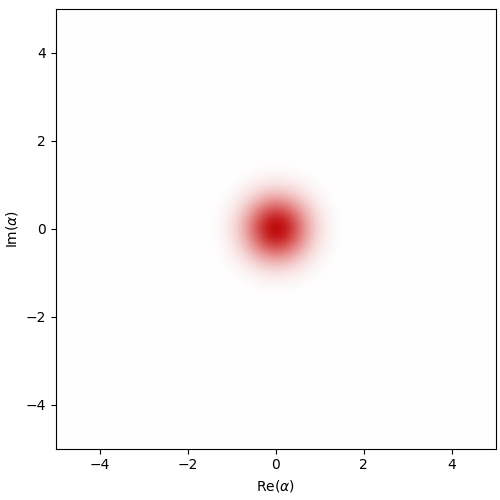

In [6]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Define units
GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

# System parameters (converted to Hz)
omega_a_0 = 5.26 * GHz  # Memory mode frequency
omega_b_0 = 7.70 * GHz  # Buffer mode frequency
phi_a = 0.06
phi_b = 0.29
e_J = 12.03 * GHz  # Josephson energy
delta_e_J = 0.47 * GHz  # Josephson energy variation

kappa_a = 9.3 * kHz  # Relaxation rate of mode a
kappa_b = 2.6 * MHz  # Relaxation rate of mode b

g2_target = 0.763 * MHz  # Target two-photon coupling strength
alpha_target = np.sqrt(5.0)  # Target alpha (cat size)

# Driving strengths
epsilon_p = 2 * g2_target / (e_J * phi_a**2 * phi_b)  # Flux pump power
epsilon_d = -alpha_target**2 * np.conj(g2_target)  # Buffer pump power

# Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5    # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))  # Memory mode annihilation operator
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))  # Buffer mode annihilation operator

# Define Hamiltonian
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

# Define phase-dependent term
phi = phi_a * (a + a.dag()) + phi_b * (b + b.dag())

# H_ATS: Asymmetrically Tuned SQUID Hamiltonian
H_ATS = dq.modulated(lambda t: -2 * e_J * jnp.sin(epsilon_p * jnp.cos(omega_b_0 * t)), dq.sinm(phi))

# H_d: Drive Hamiltonian for the buffer mode
H_d = dq.modulated(lambda t: 2 * epsilon_d * jnp.cos(omega_a_0 * t), (b + b.dag()))

# Total Hamiltonian (ensuring all terms are operator-compatible)
H = H_0 + H_ATS + H_d

# Define dissipators
L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]  # Dissipators for buffer and memory modes

# Define initial state
psi0 = dq.coherent((n_a, n_b), [0, 0])  # Vacuum state in both modes

# Time evolution
ts = jnp.linspace(0, 4000, 100)  # Simulation time

# Solve the master equation
res = dq.mesolve(H, L, psi0, ts, solver=dq.solver.Tsit5(max_steps=100000000))

# Partial trace over buffer mode to obtain the memory mode state
rho_a = dq.ptrace(res.states, 0)

# Plot the Wigner function animation
dq.plot.wigner_gif(rho_a)

In [ ]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Define units
GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

# System parameters (converted to Hz)
omega_a_0 = 5.26 * GHz  # Memory mode frequency
omega_b_0 = 7.70 * GHz  # Buffer mode frequency
phi_a = 0.06
phi_b = 0.29
e_J = 12.03 * GHz  # Josephson energy
delta_e_J = 0.47 * GHz  # Josephson energy variation

kappa_a = 9.3 * kHz  # Relaxation rate of mode a
kappa_b = 2.6 * MHz  # Relaxation rate of mode b

g2_target = 0.763 * MHz  # Target two-photon coupling strength
alpha_target = np.sqrt(5.0)  # Target alpha (cat size)

# Driving strengths
epsilon_p = 2 * g2_target / (e_J * phi_a**2 * phi_b)  # Flux pump power
epsilon_d = -alpha_target**2 * np.conj(g2_target)  # Buffer pump power

# Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5    # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))  # Memory mode annihilation operator
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))  # Buffer mode annihilation operator

# Define Hamiltonian
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

# Define phase-dependent term
phi = phi_a * (a + a.dag()) + phi_b * (b + b.dag())

# H_ATS: Asymmetrically Tuned SQUID Hamiltonian
H_ATS = dq.modulated(lambda t: -2 * e_J * jnp.sin(epsilon_p * jnp.cos(omega_b_0 * t)), dq.sinm(phi))

# H_d: Drive Hamiltonian for the buffer mode
H_d = dq.modulated(lambda t: 2 * epsilon_d * jnp.cos(omega_a_0 * t), (b + b.dag()))

# Total Hamiltonian (ensuring all terms are operator-compatible)
H = H_0 + H_ATS + H_d

# Define dissipators
L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]  # Dissipators for buffer and memory modes

# Define initial state
psi0 = dq.coherent((n_a, n_b), [0, 0])  # Vacuum state in both modes

# Time evolution
ts = jnp.linspace(0, 4000, 100)  # Simulation time

# Solve the master equation
res = dq.mesolve(H, L, psi0, ts, solver=dq.solver.Tsit5(max_steps=100000000))

# Partial trace over buffer mode to obtain the memory mode state
rho_a = dq.ptrace(res.states, 0)

# Plot the Wigner function animation
dq.plot.wigner_gif(rho_a)

In [ ]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Define units
GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

# System parameters (converted to Hz)
omega_a_0 = 5.26 * GHz  # Memory mode frequency
omega_b_0 = 7.70 * GHz  # Buffer mode frequency
phi_a = 0.06
phi_b = 0.29
e_J = 12.03 * GHz  # Josephson energy
delta_e_J = 0.47 * GHz  # Josephson energy variation

kappa_a = 9.3 * kHz  # Relaxation rate of mode a
kappa_b = 2.6 * MHz  # Relaxation rate of mode b

g2_target = 0.763 * MHz  # Target two-photon coupling strength
alpha_target = np.sqrt(5.0)  # Target alpha (cat size)

# Driving strengths
epsilon_p = 2 * g2_target / (e_J * phi_a**2 * phi_b)  # Flux pump power
epsilon_d = -alpha_target**2 * np.conj(g2_target)  # Buffer pump power

# Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5    # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))  # Memory mode annihilation operator
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))  # Buffer mode annihilation operator

# Define Hamiltonian
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

# Define phase-dependent term
phi = phi_a * (a + a.dag()) + phi_b * (b + b.dag())

# H_ATS: Asymmetrically Tuned SQUID Hamiltonian
H_ATS = dq.modulated(lambda t: -2 * e_J * jnp.sin(epsilon_p * jnp.cos(omega_b_0 * t)), dq.sinm(phi)) + \
         dq.modulated(lambda t: 2 * delta_e_J * jnp.cos(epsilon_p * jnp.cos(omega_b_0 * t)), dq.cosm(phi))

# H_d: Drive Hamiltonian for the buffer mode
H_d = dq.modulated(lambda t: 2 * epsilon_d * jnp.cos(omega_a_0 * t), (b + b.dag()))

# Total Hamiltonian (ensuring all terms are operator-compatible)
H = H_0 + H_ATS + H_d

# Define dissipators
L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]  # Dissipators for buffer and memory modes

# Define initial state
psi0 = dq.coherent((n_a, n_b), [0.5, 0])  # Vacuum state in both modes

# Time evolution
ts = jnp.linspace(0, 4000, 100)  # Simulation time

# Solve the master equation
res = dq.mesolve(H, L, psi0, ts, solver=dq.solver.Tsit5(max_steps=100000000))

# Partial trace over buffer mode to obtain the memory mode state
rho_a = dq.ptrace(res.states, 0)

# Plot the Wigner function animation
dq.plot.wigner_gif(rho_a)

/usr/local/lib/python3.11/dist-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
<ipython-input-22-855222b6824e>:53: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return H_0 + H_ATS + H_d
/usr/local/lib/python3.11/dist-packages/dynamiqs/qarrays/qarray.py:481: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self.__add__(y)
|██████████| 100.0% ◆ elapsed 04m32s ◆ remaining 0.00ms
100%|██████████| 50/50 [00:08<00:00,  6.19it/s]


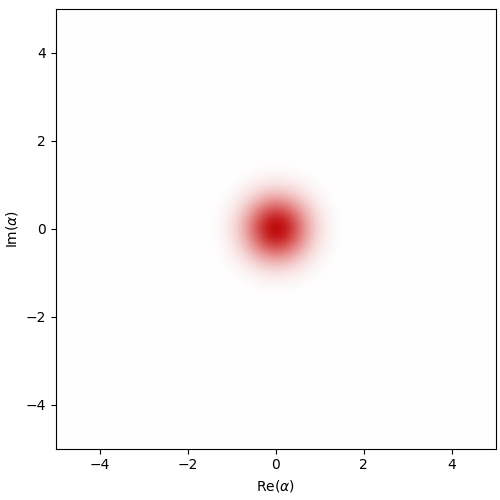

In [22]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Define frequency units
GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

# System parameters from the problem statement
omega_a_0 = 5.26 * GHz  # Mode a frequency
omega_b_0 = 7.70 * GHz  # Mode b frequency
phi_a = 0.06  # Zero-point fluctuation phase of mode a
phi_b = 0.29  # Zero-point fluctuation phase of mode b
E_J = 42.76 * GHz  # Josephson energy
delta_E_J = 0.47 * GHz  # Energy splitting
omega_d = 7.623 * GHz  # Drive frequency
omega_p = 2.891 * GHz  # Pump frequency
epsilon_d = -3.815 * MHz  # Buffer pump power
epsilon_p = 0.122  # Flux pump power

# Dissipation rates
kappa_a = 9.3 * kHz  # Relaxation rate of mode a
kappa_b = 0.5 * MHz  # Relaxation rate of mode b

# Define the Hilbert space (Fock space dimensions)
n_fock_a = 30  # Memory mode
n_fock_b = 7   # Buffer mode

# Create annihilation operators for both modes
a = dq.tensor(dq.destroy(n_fock_a), dq.eye(n_fock_b))  # Mode a
b = dq.tensor(dq.eye(n_fock_a), dq.destroy(n_fock_b))  # Mode b

# Identity operator
identity = dq.tensor(dq.eye(n_fock_a), dq.eye(n_fock_b))

# Define the ATS driving term
eps_ats = lambda t: epsilon_p * jnp.cos(omega_p * t)

# Define the Hamiltonian in the lab frame
def hamiltonian_lab(t):
    # Bare system Hamiltonian
    H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

    # ATS Interaction term
    phi = phi_a * (a + a.dag()) + phi_b * (b + b.dag())
    H_ATS = -2 * E_J * dq.sinm(phi) + 2 * delta_E_J * dq.cosm(phi)

    # Buffer drive term
    H_d = epsilon_d * (b + b.dag())

    return H_0 + H_ATS + H_d

# Convert Hamiltonian to a time-callable function
H = dq.timecallable(hamiltonian_lab)

# Define dissipation terms (Lindblad operators)
L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]

# Initial state: Vacuum in both modes
psi0 = dq.coherent((n_fock_a, n_fock_b), [0, 0])

# Time evolution parameters
T_final = 40.0  # Simulate up to 10 microseconds to see full cat state formation
timesteps = 200  # Number of time steps
t = jnp.linspace(0, T_final, timesteps)

# Solve the master equation
res = dq.mesolve(H, L, psi0, t, solver=dq.solver.Tsit5(max_steps=100000000))

# Extract density matrix for mode a (memory mode)
rho_a = dq.ptrace(res.states, 0)

# Plot the Wigner function evolution as a GIF
dq.plot.wigner_gif(rho_a)

# Plot Wigner mosaic - Wigner functions at different times
#dq.plot.wigner_mosaic(rho_a, cross=True)

/usr/local/lib/python3.11/dist-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
<ipython-input-25-b791196bf6cd>:58: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return H_0 + H_ATS + H_d
/usr/local/lib/python3.11/dist-packages/dynamiqs/qarrays/qarray.py:481: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  return self.__add__(y)
|██████████| 100.0% ◆ elapsed 26.83s ◆ remaining 0.00ms 
100%|██████████| 50/50 [00:06<00:00,  7.53it/s]


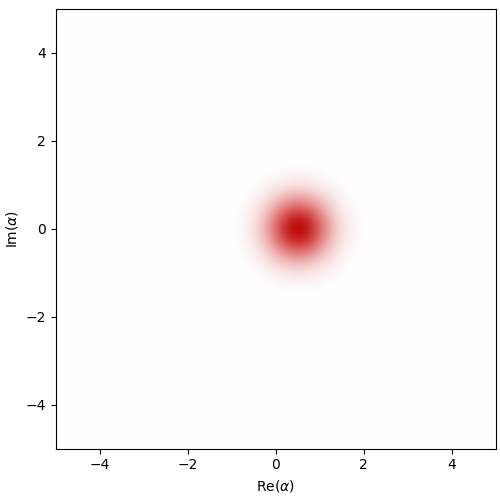

In [25]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Define frequency units
GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

# System parameters from the problem statement
omega_a_0 = 5.26 * GHz  # Mode a frequency
omega_b_0 = 7.70 * GHz  # Mode b frequency
phi_a = 0.06  # Zero-point fluctuation phase of mode a
phi_b = 0.29  # Zero-point fluctuation phase of mode b
E_J = 12.03 * GHz  # Josephson energy
delta_E_J = 0.47 * GHz  # Energy splitting
omega_d = 7.623 * GHz  # Drive frequency
omega_p = 2.891 * GHz  # Pump frequency
epsilon_d = -3.815 * MHz  # Buffer pump power
epsilon_p = 0.122  # Flux pump power

# Dissipation rates
kappa_a = 9.3 * kHz  # Relaxation rate of mode a
kappa_b = 2.6 * MHz  # Relaxation rate of mode b

# Define the Hilbert space (Fock space dimensions)
n_fock_a = 50  # Memory mode
n_fock_b = 11   # Buffer mode

# Create annihilation operators for both modes
a = dq.tensor(dq.destroy(n_fock_a), dq.eye(n_fock_b))  # Mode a
b = dq.tensor(dq.eye(n_fock_a), dq.destroy(n_fock_b))  # Mode b

# Identity operator
identity = dq.tensor(dq.eye(n_fock_a), dq.eye(n_fock_b))

# Define displacement fields (stationary solution in the rotating frame)
alpha_1 = (1j * E_J * epsilon_p * phi_a) / (kappa_a / 2 + 1j * (omega_a_0 - omega_p))
alpha_2 = (1j * E_J * epsilon_p * phi_a) / (kappa_a / 2 + 1j * (omega_a_0 + omega_p))
beta_1 = (1j * E_J * epsilon_p * phi_b) / (kappa_b / 2 + 1j * (omega_b_0 - omega_p))
beta_2 = (1j * E_J * epsilon_p * phi_b) / (kappa_b / 2 + 1j * (omega_b_0 + omega_p))

# Define the Rotated-Displaced Hamiltonian
def hamiltonian_rot_displaced():
    # Displaced operators
    a_disp = a - dq.tensor((alpha_1 + alpha_2)*dq.eye(n_fock_a), dq.eye(n_fock_b))
    b_disp = b - dq.tensor((beta_1 + beta_2)*dq.eye(n_fock_a), dq.eye(n_fock_b))

    # Phase operator in displaced frame
    phi_disp = phi_a * (a_disp + dq.dag(a_disp)) + phi_b * (b_disp + dq.dag(b_disp))

    # Hamiltonian terms
    H_0 = omega_a_0 * dq.dag(a_disp) @ a_disp + omega_b_0 * dq.dag(b_disp) @ b_disp
    H_ATS = -2 * E_J * dq.sinm(phi_disp) + 2 * delta_E_J * dq.cosm(phi_disp)
    H_d = epsilon_d * (b_disp + dq.dag(b_disp))

    return H_0 + H_ATS + H_d

# Compute Hamiltonian once (time-independent)
H_rot_displaced = hamiltonian_rot_displaced()

# Define dissipation terms (Lindblad operators)
L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]

# Initial state: Vacuum in both modes
psi0 = dq.coherent((n_fock_a, n_fock_b), [0.5, 0])

# Time evolution parameters
T_final = 10.0  # Simulate up to 10 microseconds
timesteps = 200  # Number of time steps
t = jnp.linspace(0, T_final, timesteps)

# Solve the master equation in the rotated-displaced frame
res = dq.mesolve(H_rot_displaced, L, psi0, t, solver=dq.solver.Tsit5(max_steps=100000000))

# Extract density matrix for mode a (memory mode)
rho_a = dq.ptrace(res.states, 0)

# Plot the Wigner function evolution as a GIF (now should show a stable cat state)
dq.plot.wigner_gif(rho_a)

# Plot Wigner mosaic - Wigner functions at different times
#dq.plot.wigner_mosaic(rho_a, cross=True)

/usr/local/lib/python3.11/dist-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
|          |   0.5% ◆ elapsed 1.68s ◆ remaining 05m37s
|██████████| 100.0% ◆ elapsed 06m10s ◆ remaining 0.00ms 

100%|██████████| 50/50 [06:18<00:00,  7.57s/it]


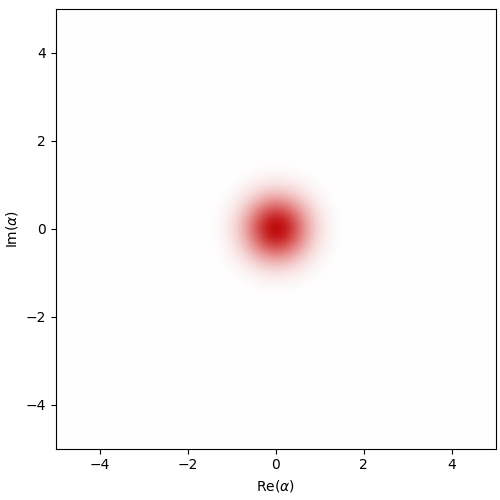

In [3]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

#System parameters converted to Hz
#system parameters (from the challenge)
omega_a_0 = 5.26 * 2 * jnp.pi  # GHz (memory mode frequency)
omega_b_0 = 7.70 * 2 * jnp.pi  # GHz (buffer mode frequency)
phi_a = 0.06
phi_b = 0.29
h = 6.626e-25  # Planck's constant in GHz·s
E_J = 42.76  # Convert from GHz to actual energy
delta_E_J = 0.47  # Convert from GHz to actual energy
omega_d = 7.623 * 2 * jnp.pi  # GHz (drive frequency)
omega_p = 2.891 * 2 * jnp.pi  # GHz (pump frequency)
epsilon_d = -3.815 * 2 * jnp.pi * 1e-3  # MHz converted to GHz
epsilon_p = 0.122  # rad

#Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))  # Memory mode annihilation operator
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))  # Buffer mode annihilation operator

#Define the Hamiltonian
#H_0: Free Hamiltonian
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

phi = phi_a*(a+a.dag()) + phi_b*(b+b.dag())
#H_ATS: Asymmetrically Tuned SQUID Hamiltonian (converted to operator form)
H_ATS = dq.modulated(lambda t: -2 * E_J * jnp.sin(epsilon_p * jnp.cos(omega_p*t)), dq.sinm(phi))+ dq.modulated(lambda t: 2* delta_E_J * jnp.cos(epsilon_p * jnp.cos(omega_p*t)), dq.cosm(phi))

#H_d: Drive Hamiltonian for the buffer mode
H_d = dq.timecallable(lambda t: 2 * epsilon_d * jnp.cos(omega_d * t ) * (b + b.dag()))

#Total Hamiltonian (ensuring all terms are operator-compatible)
H = H_0 + H_ATS + H_d

kappa_a = 9.3 * 1e-6 # relaxation rate of mode a
kappa_b = 2.6 * 1e-3 # relaxation rate of mode b

L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]  # Dissipators for buffer and memory modes

psi0 = dq.coherent((n_a, n_b), [0, 0])  # Vacuum state in both modes

t = jnp.linspace(0, 40, 100)  # Time from 0 to 4 units

res = dq.mesolve(H, L, psi0, t)

rho_a = dq.ptrace(res.states, 0)

dq.plot.wigner_gif(rho_a)

In [ ]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

#System parameters converted to Hz
#system parameters (from the challenge)
omega_a_0 = 5.26 * 2 * jnp.pi  # GHz (memory mode frequency)
omega_b_0 = 7.70 * 2 * jnp.pi  # GHz (buffer mode frequency)
phi_a = 0.06
phi_b = 0.29
h = 6.626e-25  # Planck's constant in GHz·s
E_J = 42.76  # Convert from GHz to actual energy
delta_E_J = 0.47  # Convert from GHz to actual energy
omega_d = 7.623 * 2 * jnp.pi  # GHz (drive frequency)
omega_p = 2.891 * 2 * jnp.pi  # GHz (pump frequency)
epsilon_d = -3.815 * 2 * jnp.pi * 1e-3  # MHz converted to GHz
epsilon_p = 0.122  # rad

#Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))  # Memory mode annihilation operator
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))  # Buffer mode annihilation operator

#Define the Hamiltonian
#H_0: Free Hamiltonian
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

phi = phi_a*(a+a.dag()) + phi_b*(b+b.dag())
#H_ATS: Asymmetrically Tuned SQUID Hamiltonian (converted to operator form)
H_ATS = dq.modulated(lambda t: -2 * E_J * jnp.sin(epsilon_p * jnp.cos(omega_p*t)), dq.sinm(phi))+ dq.modulated(lambda t: 2* delta_E_J * jnp.cos(epsilon_p * jnp.cos(omega_p*t)), dq.cosm(phi))

#H_d: Drive Hamiltonian for the buffer mode
H_d = dq.timecallable(lambda t: 2 * epsilon_d * jnp.cos(omega_d * t ) * (b + b.dag()))

#Total Hamiltonian (ensuring all terms are operator-compatible)
H = H_0 + H_ATS + H_d

kappa_a = 9.3 * 1e-6 # relaxation rate of mode a
kappa_b = 2.6 * 1e-3 # relaxation rate of mode b

L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]  # Dissipators for buffer and memory modes

psi0 = dq.coherent((n_a, n_b), [0, 0])  # Vacuum state in both modes

t = jnp.linspace(0, 400, 100)  # Time from 0 to 4 units

res = dq.mesolve(H, L, psi0, t, solver = dq.solver.Tsit5(max_steps=100000000))

rho_a = dq.ptrace(res.states, 0)

dq.plot.wigner_gif(rho_a)

/usr/local/lib/python3.11/dist-packages/equinox/_module.py:1096: UserWarning: A `SparseDIAQArray` has been converted to a `DenseQArray` while computing its matrix exponential.
  return self.__func__(self.__self__, *args, **kwargs)
|          |   0.0% ◆ elapsed 23.07ms ◆ remaining 0.00ms
|█▊        |  18.5% ◆ elapsed 12m29s ◆ remaining 59m57s

In [ ]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Define frequency units
GHz = 1.0
MHz = 1e-3 * GHz
kHz = 1e-3 * MHz

# System parameters from the problem statement
omega_a_0 = 5.26 * GHz  # Mode a frequency
omega_b_0 = 7.70 * GHz  # Mode b frequency
phi_a = 0.06  # Zero-point fluctuation phase of mode a
phi_b = 0.29  # Zero-point fluctuation phase of mode b
E_J = 12.03 * GHz  # Josephson energy
delta_E_J = 0.47 * GHz  # Energy splitting
omega_d = 7.623 * GHz  # Drive frequency
omega_p = 2.891 * GHz  # Pump frequency
epsilon_d = -3.815 * MHz  # Buffer pump power
epsilon_p = 0.122  # Flux pump power

# Dissipation rates
kappa_a = 9.3 * MHz  # Relaxation rate of mode a
kappa_b = 2.6 * MHz  # Relaxation rate of mode b

2. Define Quantum Operators

In [ ]:
# Define the Hilbert space (Fock space dimensions)
n_fock_a = 30  # Memory mode
n_fock_b = 7   # Buffer mode

# Create annihilation operators for both modes
a = dq.tensor(dq.destroy(n_fock_a), dq.eye(n_fock_b))  # Mode a
b = dq.tensor(dq.eye(n_fock_a), dq.destroy(n_fock_b))  # Mode b

# Identity operator
identity = dq.tensor(dq.eye(n_fock_a), dq.eye(n_fock_b))

3. Define the Hamiltonian

The lab frame Hamiltonian consists of:
	1.	Bare system Hamiltonian  ```math H_0 ```
	2.	ATS interaction term  ```math H_{\text{ATS}} ```
	3.	Buffer drive term  ```math H_d``` 

In [ ]:
# Bare Hamiltonian (non-interacting)
H_0 = omega_a_0 * (a.dag() @ a) + omega_b_0 * (b.dag() @ b)

# ATS Interaction term
phi = phi_a * (a + a.dag()) + phi_b * (b + b.dag())
H_ATS = -2 * E_J * dq.sinm(phi) + 2 * delta_E_J * dq.cosm(phi)

# Buffer drive term
H_d = epsilon_d * (b + b.dag())

# Total Hamiltonian in the lab frame
H = H_0 + H_ATS + H_d

/var/folders/s8/49z4mhw56f1gk77hx70jgjsw0000gn/T/ipykernel_65701/1622262085.py:12: UserWarning: A sparse qarray has been converted to dense layout due to element-wise addition with a dense qarray.
  H = H_0 + H_ATS + H_d


4. Solve the Master Equation

In [ ]:
# Dissipation terms (Lindblad operators)
L = [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a]

# Initial state: Vacuum in both modes
psi0 = dq.coherent((n_fock_a, n_fock_b), [0.5, 0])

# Time evolution parameters
T_final = 4.0  # Simulate up to 4 microseconds
timesteps = 100  # Number of time steps
t = jnp.linspace(0, T_final, timesteps)

# Solve master equation
res = dq.mesolve(H, L, psi0, t, solver=dq.solver.Tsit5(max_steps=100000000))

# Extract density matrix for mode a (memory mode)
rho_a = dq.ptrace(res.states, 0)

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|██████████| 100.0% ◆ elapsed 4.52s ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:06<00:00,  7.78it/s]


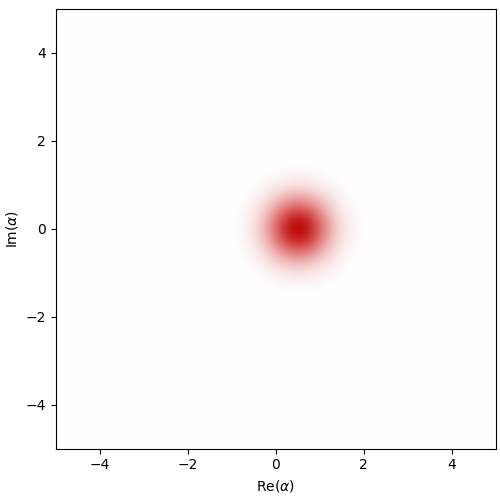

In [ ]:
# Plot the Wigner function evolution as a GIF
dq.plot.wigner_gif(rho_a)

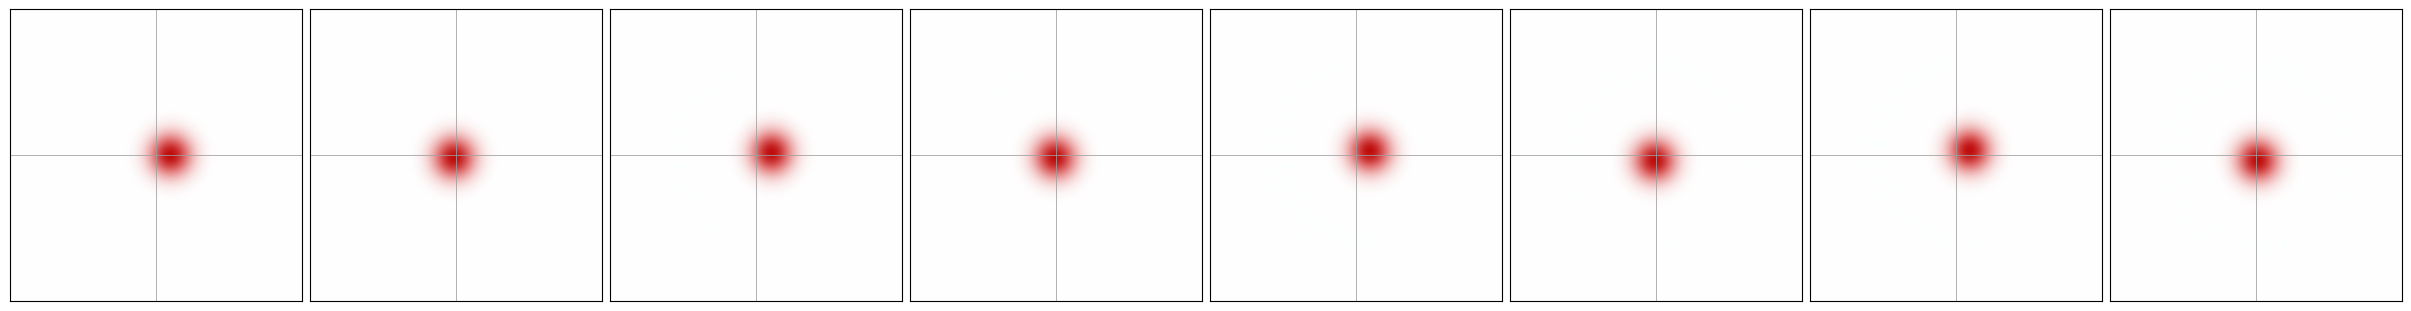

In [ ]:
#Plot Wigner mosaic - Wigner functions at different times
dq.plot.wigner_mosaic(rho_a, cross = True)

|██████████| 100.0% ◆ elapsed 25m14s ◆ remaining 0.00ms  
100%|██████████| 50/50 [25:15<00:00, 30.31s/it]


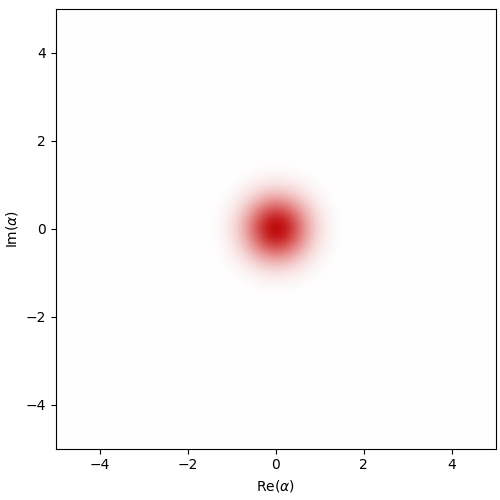

In [ ]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

(na, nb) = (20, 5)
a, b = dq.destroy(na, nb)
adag, bdag = a.dag(), b.dag()
psi0 = dq.fock((na, nb), (0, 0))

omega_a0 = 5.26 * 1000
omega_b0 = 7.70 * 1000
phi_a = 0.06
phi_b = 0.29
Ej = 12.03 * 1000
delta_Ej = 0.47 * 1000
omega_d = 7.623 * 1000
omega_p = 2.891 *  1000
epsilon_d = -3.815
epsilon_p = 0.122

phi_hat = phi_a * (a + adag) + phi_b * (b + bdag)

f0 = lambda t: omega_a0 * (adag @ a) + omega_b0 * (bdag @ b)
epsilon = lambda t: epsilon_p * jnp.cos(omega_p * t)
fATS = lambda t: (
    -2 * Ej * (epsilon(t) * (phi_a * (a + adag) - phi_b * (b + bdag) - 1/6 * dq.powm(phi_a * (a + adag) + phi_b * (b + bdag), 3)))
    + 2 * delta_Ej * (epsilon(t) * (phi_a * (a + adag) - phi_b * (b + bdag) - 1/2 * dq.powm(phi_a * (a + adag) + phi_b * (b + bdag), 2)))
)
fD = lambda t: 2 * epsilon_d * jnp.cos(omega_d * t) * (b + bdag)
H = dq.timecallable(f0) + dq.timecallable(fATS) + dq.timecallable(fD)

kappa_a = 9.3 / 1000
kappa_b = 2.6

tsave = jnp.linspace(0, 4, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a], psi0, tsave, solver = dq.solver.Tsit5(max_steps = 1000000000))
rho1 = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rho1)

|██████████| 100.0% ◆ elapsed 24m10s ◆ remaining 0.00ms  
100%|██████████| 50/50 [24:12<00:00, 29.05s/it]


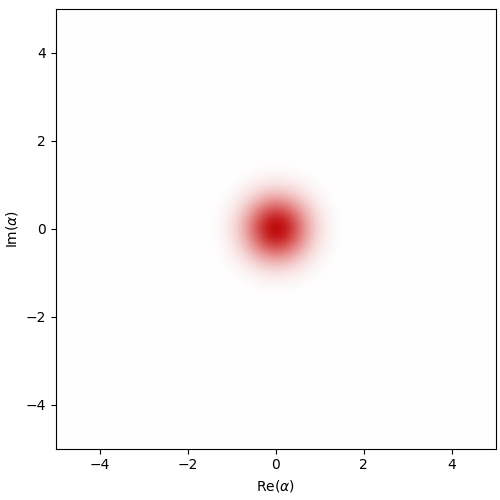

In [ ]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

(na, nb) = (20, 5)
a, b = dq.destroy(na, nb)
adag, bdag = a.dag(), b.dag()
psi0 = dq.fock((na, nb), (0, 0))

omega_a0 = 5.26 * 1000
omega_b0 = 7.70 * 1000
phi_a = 0.06
phi_b = 0.29
Ej = 12.03 * 1000
delta_Ej = 0.47 * 1000
omega_d = 7.623 * 1000
omega_p = 2.891 *  1000
epsilon_d = -3.815
epsilon_p = 0.122

phi_hat = phi_a * (a + adag) + phi_b * (b + bdag)

H0 = omega_a0 * (adag @ a) + omega_b0 * (bdag @ b)
epsilon = epsilon_p * jnp.cos(omega_p)
HATS = (
    -2 * Ej * (epsilon * (phi_a * (a + adag) - phi_b * (b + bdag) - 1/6 * dq.powm(phi_a * (a + adag) + phi_b * (b + bdag), 3)))
    + 2 * delta_Ej * (epsilon * (phi_a * (a + adag) - phi_b * (b + bdag) - 1/2 * dq.powm(phi_a * (a + adag) + phi_b * (b + bdag), 2)))
)
HD = 2 * epsilon_d * jnp.cos(omega_d ) * (b + bdag)
H = H0 + HATS + HD

kappa_a = 9.3 / 1000
kappa_b = 2.6

tsave = jnp.linspace(0, 4, 100)
res = dq.mesolve(H, [jnp.sqrt(kappa_b) * b, jnp.sqrt(kappa_a) * a], psi0, tsave, solver = dq.solver.Tsit5(max_steps = 1000000000))
rho1 = dq.ptrace(res.states, 0)
dq.plot.wigner_gif(rho1)